In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
import pandas as pd
from collections import Counter
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


class Feat_select:


    def __init__(self):

        pass

    def rank(self, df):
            """
            Entrada dos 3 data frames de empresas conhecidas
            Retorna uma lista com combinações de features selecionadas por Random Forest Rank
            necessita da entrada de 3 df distintos que representem algum grupo pré estabelecido

            """

            X = df.drop(['Survived'], axis=1)
            y = df['Survived']
            # estimators
            rf = RandomForestClassifier()
            rf = rf.fit(X, y)
            rfe = RFE(rf, n_features_to_select=1, verbose=2)
            rfe = rfe.fit(X, y)
            rank = pd.DataFrame({'features': X.columns})
            rank['RF rank'] = rfe.ranking_

            rfr = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
            rfr.fit(X, y)
            rank['RFR'] = (rfr.feature_importances_ * 100)

            linreg = LinearRegression(normalize=True)
            linreg.fit(X, y)
            rank['linreg'] = (linreg.coef_.round(3) * 10)

            model = LogisticRegression(solver='liblinear')
            rfe = RFE(model, 3)
            rfe = rfe.fit(X, y)
            rank['logreg'] = rfe.ranking_

            etc = ExtraTreesClassifier()
            etc.fit(X, y)
            rank['etc'] = (etc.feature_importances_.round(3) * 100)

            test = SelectKBest(score_func=f_classif, k=4)
            fit = test.fit(X, y)
            set_printoptions(precision=3)
            rank['f_score'] = fit.scores_
            print(rank.sort_values('RF rank', ascending=True))

            # opções de listas de features selecionadas para cada estimador
            lista_comb_feat_RFR = []
            lista_comb_feat_RFrank = []
            lista_comb_feat_linreg = []
            lista_comb_feat_logreg = []
            lista_comb_feat_etc = []
            lista_comb_feat_f_score = []
            for x in range(2, 11):
                lista_comb_feat_RFR.append(rank.sort_values('RFR', ascending=False).head(x)['features'].tolist())
                lista_comb_feat_RFrank.append(rank.sort_values('RF rank', ascending=True).head(x)['features'].tolist())
                lista_comb_feat_linreg.append(rank.sort_values('linreg', ascending=False).head(x)['features'].tolist())
                lista_comb_feat_logreg.append(rank.sort_values('logreg', ascending=True).head(x)['features'].tolist())
                lista_comb_feat_etc.append(rank.sort_values('etc', ascending=False).head(x)['features'].tolist())
                lista_comb_feat_f_score.append(rank.sort_values('f_score', ascending=False).head(x)['features'].tolist())

            return lista_comb_feat_RFrank
        
        

In [11]:
df = pd.read_csv('data/train.csv')

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
1,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
2,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
3,741,1,1,"Hawksford, Mr. Walter James",male,NaN,0,0,16988,30.0000,D45,S
4,699,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C


In [36]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

/home/lucas/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
exploracao = pd.DataFrame({'nomes': df.columns, 'tipos': df.dtypes,
                                   'NA #': df.isna().sum(), 'NA %': (df.isna().sum() / df.shape[0]) * 100})
exploracao

,nomes,tipos,NA #,NA %
Survived,Survived,int64,0,0.0
Pclass,Pclass,int64,0,0.0
Sex,Sex,object,0,0.0
Age,Age,float64,0,0.0
SibSp,SibSp,int64,0,0.0
Parch,Parch,int64,0,0.0
Fare,Fare,float64,0,0.0
Embarked,Embarked,object,0,0.0


In [26]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,452.372392,0.394864,2.295345,29.344575,0.536116,0.398074,33.810232
std,251.236932,0.489214,0.846457,13.049252,1.085521,0.826877,51.205014
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,242.500000,0.000000,1.000000,22.000000,0.000000,0.000000,7.925000
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,665.000000,1.000000,3.000000,35.000000,1.000000,0.000000,33.760400
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [29]:
df.drop('Cabin', axis=1,inplace=True)

In [34]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [33]:
df = df.dropna()

In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,male,28.0,0,0,52.0000,S
1,1,2,female,21.0,0,0,10.5000,S
2,1,1,female,35.0,0,0,512.3292,C
3,1,1,male,28.0,0,0,30.0000,S
4,0,1,male,49.0,1,1,110.8833,C


In [39]:
list_dummies_object = ['Sex','Embarked']

In [40]:
dummies = pd.get_dummies(df[list_dummies_object], drop_first=True)
df_dummy = pd.concat([df.drop(list_dummies_object, axis=1), dummies], axis=1)
df_dummy.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,1,28.0,0,0,52.0000,1,0,1
1,1,2,21.0,0,0,10.5000,0,0,1
2,1,1,35.0,0,0,512.3292,0,0,0
3,1,1,28.0,0,0,30.0000,1,0,1
4,0,1,49.0,1,1,110.8833,1,0,0


In [43]:
Feat_select().rank(df_dummy)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50building tree 4 of 50

building tree 5 of 50
building tree 6 of 50building tree 7 of 50

building tree 8 of 50
building tree 9 of 50building tree 10 of 50

building tree 11 of 50
building tree 12 of 50
building tree 13 of 50building tree 14 of 50

building tree 15 of 50
building tree 16 of 50building tree 17 of 50

building tree 18 of 50
building tree 19 of 50
building tree 20 of 50building tree 21 of 50

building tree 22 of 50
building tree 23 of 50
building tree 24 of 50building tree 25 of 50

building tree 26 of 50
building tree 27 of 50building tree 28 of 50

building tree 29 of 50building tree 30 of 50

building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50building tree 36 of 50

building tree 37 of 50
building tree 38 of 50building tree 39 of 50
building tree 40 of 50building tree 41 of 50


building tree 42 of 50
building tree 43 of 50building tree 44 of 5

[['Fare', 'Age'],
 ['Fare', 'Age', 'Sex_male'],
 ['Fare', 'Age', 'Sex_male', 'Pclass'],
 ['Fare', 'Age', 'Sex_male', 'Pclass', 'SibSp'],
 ['Fare', 'Age', 'Sex_male', 'Pclass', 'SibSp', 'Parch'],
 ['Fare', 'Age', 'Sex_male', 'Pclass', 'SibSp', 'Parch', 'Embarked_S'],
 ['Fare',
  'Age',
  'Sex_male',
  'Pclass',
  'SibSp',
  'Parch',
  'Embarked_S',
  'Embarked_Q'],
 ['Fare',
  'Age',
  'Sex_male',
  'Pclass',
  'SibSp',
  'Parch',
  'Embarked_S',
  'Embarked_Q'],
 ['Fare',
  'Age',
  'Sex_male',
  'Pclass',
  'SibSp',
  'Parch',
  'Embarked_S',
  'Embarked_Q']]

In [221]:
X = df_dummy.drop('Survived',axis=1)
y = df_dummy['Survived']

In [222]:
from sklearn.model_selection import train_test_split

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [195]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/lucas/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/lucas/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lucas/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHE

LOGR: 0.782642 (0.061594)
RFC: 0.814823 (0.052100)


/home/lucas/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ETC: 0.803559 (0.043070)
LDA: 0.784229 (0.054021)
KNN: 0.693984 (0.065147)


/home/lucas/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/lucas/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/lucas/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.771429 (0.067183)
NB: 0.760087 (0.055028)


/home/lucas/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/lucas/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.668228 (0.062768)


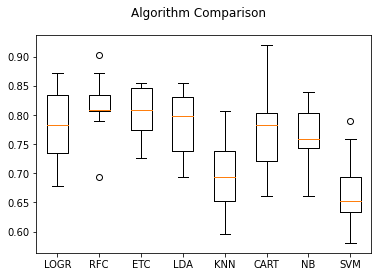

In [65]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LOGR', LogisticRegression()))
models.append(('RFC', RandomForestClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [224]:
cls = LinearRegression()
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [226]:
dummies = pd.get_dummies(test[list_dummies_object], drop_first=True)
test_dummy = pd.concat([test.drop(list_dummies_object, axis=1), dummies], axis=1)
test_dummy.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,20.00,0,0,7.0500,1,0,1
1,3,18.00,2,0,18.0000,0,0,1
2,2,0.67,1,1,14.5000,1,0,1
3,1,58.00,0,2,113.2750,1,0,0
4,3,30.00,0,0,7.2292,1,0,0


In [227]:
# test_dummy = sc.transform(test_dummy)
pred = cls.predict(test_dummy)
pred

array([ 0.157,  0.581,  0.364,  0.353,  0.172,  0.157,  0.458,  0.191,
        0.113,  0.768,  0.053,  0.06 ,  0.046,  0.723,  0.181,  0.108,
        0.238,  0.746,  0.07 ,  0.111,  0.624,  0.265,  0.757,  0.017,
        0.124,  0.668,  0.706,  0.387,  0.595,  0.139,  0.318,  0.646,
        0.124,  0.153,  0.386,  0.248,  0.157,  0.594,  0.162,  0.69 ,
        0.008,  0.71 ,  0.897, -0.069,  0.303,  0.376,  0.117,  0.593,
        0.074,  0.113,  0.255,  0.113, -0.006,  0.601,  0.293,  0.342,
        0.091,  0.118,  0.015,  0.592,  0.183,  0.146,  0.221,  0.705,
        0.21 ,  0.388,  0.183,  0.998,  0.135,  0.033,  0.258,  0.549,
       -0.069,  0.113,  0.133,  0.951,  0.174,  0.293,  0.112,  0.673,
        1.044,  0.089,  0.189,  0.085,  0.149,  0.681,  0.387,  0.254,
        0.291,  0.733,  0.647,  0.047,  1.073,  0.354,  0.146,  0.255,
        0.24 ,  0.669,  1.015,  0.696,  0.282,  0.113, -0.279,  0.273,
        0.153,  0.122,  0.048,  0.113,  0.291,  0.157,  0.656,  0.188,
      

In [228]:
result['Survived'] = pred

In [231]:
result.describe()

,PassengerId,Survived
count,268.000000,268.000000
mean,431.186567,0.336047
std,270.945388,0.281881
min,4.000000,0.000000
25%,177.250000,0.112757
50%,439.000000,0.234712
75%,677.000000,0.623703
max,887.000000,0.997887


In [230]:
result[['Survived']] = result[['Survived']].clip(lower=0)



for n in range (len(result['Survived'])):
    if result['Survived'][n] > 1:
        result['Survived'][n] = 0

/home/lucas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [232]:
result.to_csv('/home/lucas/PycharmProjects/git/Kaggle competitions/result.csv',index=False)

# ANN

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

In [117]:
X = df_dummy.drop('Survived',axis=1).values
y = df_dummy['Survived'].values

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [119]:
scaler = MinMaxScaler()

In [120]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [121]:
X_train.shape

(434, 8)

In [77]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [78]:
model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))  #neuron nets
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1))  # output

model.compile(optimizer='adam', loss='mse')

In [79]:
# validation data pode mostrar se estamos tendo problemas de overfit, plota o train e test
# batch_size = quanto menor menos chance de overfit(64,128,256...)

model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
                                                batch_size=128, epochs=400)

Train on 434 samples, validate on 187 samples
Epoch 1/400
434/434 [==============================] - 1s 3ms/sample - loss: 0.4003 - val_loss: 0.3919
Epoch 2/400
434/434 [==============================] - 0s 81us/sample - loss: 0.3830 - val_loss: 0.3768
Epoch 3/400
434/434 [==============================] - 0s 56us/sample - loss: 0.3695 - val_loss: 0.3635
Epoch 4/400
434/434 [==============================] - 0s 46us/sample - loss: 0.3561 - val_loss: 0.3509
Epoch 5/400
434/434 [==============================] - 0s 36us/sample - loss: 0.3446 - val_loss: 0.3387
Epoch 6/400
434/434 [==============================] - 0s 45us/sample - loss: 0.3326 - val_loss: 0.3277
Epoch 7/400
434/434 [==============================] - 0s 37us/sample - loss: 0.3222 - val_loss: 0.3176
Epoch 8/400
434/434 [==============================] - 0s 39us/sample - loss: 0.3124 - val_loss: 0.3083
Epoch 9/400
434/434 [==============================] - 0s 41us/sample - loss: 0.3035 - val_loss: 0.2990
Epoch 10/400
434/43

434/434 [==============================] - 0s 56us/sample - loss: 0.1293 - val_loss: 0.1441
Epoch 156/400
434/434 [==============================] - 0s 31us/sample - loss: 0.1293 - val_loss: 0.1450
Epoch 157/400
434/434 [==============================] - 0s 35us/sample - loss: 0.1298 - val_loss: 0.1452
Epoch 158/400
434/434 [==============================] - 0s 41us/sample - loss: 0.1297 - val_loss: 0.1445
Epoch 159/400
434/434 [==============================] - 0s 41us/sample - loss: 0.1294 - val_loss: 0.1446
Epoch 160/400
434/434 [==============================] - 0s 40us/sample - loss: 0.1293 - val_loss: 0.1446
Epoch 161/400
434/434 [==============================] - 0s 40us/sample - loss: 0.1295 - val_loss: 0.1446
Epoch 162/400
434/434 [==============================] - 0s 72us/sample - loss: 0.1290 - val_loss: 0.1459
Epoch 163/400
434/434 [==============================] - 0s 55us/sample - loss: 0.1290 - val_loss: 0.1457
Epoch 164/400
434/434 [==============================] - 0s 

434/434 [==============================] - 0s 43us/sample - loss: 0.1230 - val_loss: 0.1485
Epoch 310/400
434/434 [==============================] - 0s 46us/sample - loss: 0.1213 - val_loss: 0.1494
Epoch 311/400
434/434 [==============================] - 0s 55us/sample - loss: 0.1222 - val_loss: 0.1498
Epoch 312/400
434/434 [==============================] - 0s 45us/sample - loss: 0.1218 - val_loss: 0.1479
Epoch 313/400
434/434 [==============================] - 0s 43us/sample - loss: 0.1215 - val_loss: 0.1480
Epoch 314/400
434/434 [==============================] - 0s 30us/sample - loss: 0.1218 - val_loss: 0.1482
Epoch 315/400
434/434 [==============================] - 0s 31us/sample - loss: 0.1211 - val_loss: 0.1485
Epoch 316/400
434/434 [==============================] - 0s 37us/sample - loss: 0.1210 - val_loss: 0.1487
Epoch 317/400
434/434 [==============================] - 0s 49us/sample - loss: 0.1210 - val_loss: 0.1491
Epoch 318/400
434/434 [==============================] - 0s 

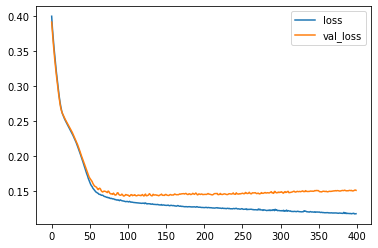

In [80]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [112]:
y_pred = model.predict(X_test)

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, classification_report, confusion_matrix

In [122]:
print(mean_absolute_error(y_test, y_pred))

0.29634609089337566


In [113]:
pd.DataFrame(y_pred)

,0
0,0.000196
1,0.605049
2,0.151067
3,0.166361
4,0.177636
...,...
182,0.681893
183,0.333352
184,0.189935
185,0.292700


In [124]:
test = pd.read_csv('data/test.csv')

In [125]:
pd.read_csv('data/exemplo.csv')

,PassengerId,Survived
0,132,0.00500
1,39,0.14000
2,756,0.88000
3,660,0.79000
4,799,0.48000
...,...,...
263,197,0.15507
264,762,0.01000
265,99,0.78050
266,185,0.62000


In [128]:
df_dummy.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [131]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [133]:
test = test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex','Embarked']]

In [136]:
test.isna().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex         0
Embarked    0
dtype: int64

In [135]:
test['Age'] = test['Age'].fillna(test['Age'].median())

/home/lucas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
test

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,20.00,0,0,7.0500,male,S
1,3,18.00,2,0,18.0000,female,S
2,2,0.67,1,1,14.5000,male,S
3,1,58.00,0,2,113.2750,male,C
4,3,30.00,0,0,7.2292,male,C
...,...,...,...,...,...,...,...
263,3,28.00,0,0,7.7500,male,Q
264,3,41.00,0,0,7.1250,male,S
265,2,34.00,0,1,23.0000,female,S
266,3,4.00,0,2,22.0250,female,S


In [139]:
list_dummies_object

['Sex', 'Embarked']

In [185]:
dummies = pd.get_dummies(test[list_dummies_object], drop_first=True)
test_dummy = pd.concat([test.drop(list_dummies_object, axis=1), dummies], axis=1)
test_dummy.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,20.00,0,0,7.0500,1,0,1
1,3,18.00,2,0,18.0000,0,0,1
2,2,0.67,1,1,14.5000,1,0,1
3,1,58.00,0,2,113.2750,1,0,0
4,3,30.00,0,0,7.2292,1,0,0


In [143]:
test_dummy = test_dummy.values

In [144]:
pred = scaler.transform(test_dummy)

In [145]:
pred

array([[1.   , 0.246, 0.   , ..., 1.   , 0.   , 1.   ],
       [1.   , 0.221, 0.25 , ..., 0.   , 0.   , 1.   ],
       [0.5  , 0.003, 0.125, ..., 1.   , 0.   , 1.   ],
       ...,
       [0.5  , 0.422, 0.   , ..., 0.   , 0.   , 1.   ],
       [1.   , 0.045, 0.   , ..., 0.   , 0.   , 1.   ],
       [0.   , 0.435, 0.125, ..., 0.   , 0.   , 1.   ]])

In [146]:
pred = model.predict(pred)

In [148]:
pd.DataFrame(pred)

,0
0,0.156044
1,0.548956
2,0.509381
3,0.221025
4,0.150299
...,...
263,0.057941
264,0.158813
265,0.970044
266,0.376651


In [157]:
PassengerId = pd.read_csv('data/test.csv')['PassengerId']

In [154]:
PassengerId['Survived'] = pred

In [159]:
result = pd.DataFrame(PassengerId)
result['Survived'] = pred
result.head()

,PassengerId,Survived
0,132,0.156044
1,39,0.548956
2,756,0.509381
3,660,0.221025
4,799,0.150299


In [166]:
result[['Survived']] = result[['Survived']].clip(lower=0)

In [177]:
result[result['Survived']>1]

,PassengerId,Survived


In [176]:
for n in range (len(result['Survived'])):
    if result['Survived'][n] > 1:
        result['Survived'][n] = 0

/home/lucas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [179]:
result.to_csv('/home/lucas/PycharmProjects/git/Kaggle competitions/result.csv',index=False)

In [178]:
result.describe()

,PassengerId,Survived
count,268.000000,268.000000
mean,431.186567,0.330233
std,270.945388,0.306744
min,4.000000,0.000000
25%,177.250000,0.109986
50%,439.000000,0.173681
75%,677.000000,0.530637
max,887.000000,0.998307


In [180]:
result.shape

(268, 2)